In [1]:
import numpy as np
import pandas as pd
import pystan
from scipy.stats import norm, multivariate_normal, invwishart, invgamma, bernoulli
from statsmodels.tsa.stattools import acf
import datetime
import sys
import os

from tqdm.notebook import tqdm
from codebase.plot import * 
from codebase.data import * 
from codebase.file_utils import save_obj, load_obj

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
num_chains = 1
num_samples = 1000
num_warmup = 1000
num_iter = num_samples + num_warmup

In [3]:
log_dir = "./log/bin_sim_2factor/20191208_191630_sim0m1/"
data = load_obj('data', log_dir)
ps = load_obj('ps', log_dir)
load_sign = np.sign(np.mean(ps['beta'][0]))
ps.keys()

dict_keys(['beta', 'alpha', 'zz', 'Phi_cov', 'yy'])

In [4]:
data['beta']

array([[1. , 0. ],
       [0.8, 0. ],
       [0.8, 0. ],
       [0. , 1. ],
       [0. , 0.8],
       [0. , 0.8]])

In [5]:
np.round(np.mean(ps['beta'],0),2)

array([[1.  , 0.  ],
       [1.19, 0.  ],
       [1.22, 0.  ],
       [0.  , 1.  ],
       [0.  , 1.1 ],
       [0.  , 1.67]])

In [6]:
print(open(log_dir+'model.txt').read())

data {
  int<lower=1> N;
  int<lower=1> K;
  int<lower=1> J;
  int<lower=0, upper=1> DD[N, J];
}

transformed data{
  vector[K] zeros_K = rep_vector(0, K);
  cov_matrix[K] I_K = diag_matrix(rep_vector(1, K));
}

parameters {
  vector[J] alpha;
  matrix[2,K] beta_free; // 2 free eleements per factor
  cov_matrix [K] Phi_cov;
  matrix[N,K] zz;
}

transformed parameters{
  matrix[J,K] beta;
  matrix[N,J] yy;

  for(j in 1:J) {
    for (k in 1:K) beta[j,k] = 0;
  }
  
  // set ones
  for (k in 1:K) beta[1+3*(k-1), k] = 1;
  // set the free elements
  for (k in 1:K) beta[2+3*(k-1) : 3+3*(k-1), k] = beta_free[1:2,k];

  for (n in 1:N) yy[n,] = to_row_vector(alpha) + zz[n,] * beta';
}
  
model {
  to_vector(beta_free) ~ normal(0, 1);
  to_vector(alpha) ~ normal(0, 10);
  Phi_cov ~ inv_wishart(J+4, I_K);
  for (n in 1:N) to_vector(zz[n,]) ~ multi_normal(zeros_K, Phi_cov);
  for (j in 1:J) DD[, j] ~ bernoulli_logit(yy[, j]);
}



In [7]:
np.ndim(data['D'])

2

In [8]:
def to_str_pattern(y0):
    if np.ndim(y0) == 1:
        return ''.join(y0.astype(str))
    if np.ndim(y0) == 2:
        y = pd.DataFrame(y0)
        yresp = y.apply(lambda x: ''.join(x.astype(str)), axis=1)
        return yresp
yresp = to_str_pattern(data['D']); yresp

0      000001
1      000100
2      011000
3      110011
4      101111
5      100100
6      011011
7      101011
8      000001
9      010000
10     110111
11     100010
12     000000
13     010001
14     010110
15     111011
16     001010
17     101011
18     001001
19     000110
20     111100
21     110111
22     110101
23     101111
24     010111
25     101101
26     110001
27     000101
28     001110
29     111111
        ...  
970    000101
971    101101
972    010111
973    011011
974    011011
975    101000
976    101001
977    001011
978    110111
979    010111
980    101100
981    000011
982    111000
983    100110
984    110101
985    101000
986    101010
987    110110
988    100000
989    101001
990    111111
991    010011
992    110001
993    001000
994    100100
995    000000
996    000110
997    100011
998    011000
999    111000
Length: 1000, dtype: object

In [9]:
def to_nparray_data(yresp):
    if type(yresp) == str: 
        return np.array(list(yresp)).astype(int)
    else:
        J = len(yresp[0])
        N = yresp.shape[0]
        res = np.empty((N,J))
        for i in range(N):
            res[i] = np.array(list(yresp[i])).astype(int)
        return res

to_nparray_data(yresp).shape

(1000, 6)

In [10]:
((to_nparray_data(yresp) == data['D'])==True).all()

True

In [11]:
# count occurences
np.count_nonzero(yresp == '000000')

31

In [12]:
# list all counts
ptrns = np.unique(yresp)
for p in ptrns:
    print(p, np.count_nonzero(yresp == p))

000000 31
000001 13
000010 21
000011 21
000100 12
000101 14
000110 15
000111 20
001000 21
001001 7
001010 7
001011 13
001100 7
001101 20
001110 12
001111 17
010000 17
010001 21
010010 15
010011 11
010100 11
010101 8
010110 12
010111 21
011000 15
011001 9
011010 12
011011 11
011100 13
011101 11
011110 10
011111 21
100000 20
100001 15
100010 15
100011 9
100100 16
100101 13
100110 10
100111 19
101000 18
101001 14
101010 15
101011 12
101100 16
101101 14
101110 15
101111 18
110000 17
110001 17
110010 16
110011 19
110100 16
110101 18
110110 15
110111 17
111000 23
111001 12
111010 18
111011 17
111100 20
111101 22
111110 14
111111 31


In [27]:
np.mean(ps['alpha'],0)

array([ 0.13017852,  0.04409395, -0.0611927 , -0.01433886, -0.00728462,
        0.02504187])

In [29]:
## compute the pi's for the the j-th posterior sample
N = data['N']
L = 1000
j = 100
z_mc = multivariate_normal.rvs(np.zeros(data['K']), ps['Phi_cov'][j], size = L);
ystr = np.empty((L, data['J']))
for l in range(L):
    ystr[l] = ps['alpha'][j] + z_mc[l] @ ps['beta'][j].T
pistr = expit(ystr)

# first create L expit(ystr) and then take average
# piprob length L
# piavg over L result vector size p


In [30]:
np.mean(ystr,0)


array([ 0.20096075,  0.14919825,  0.00919257, -0.09581738,  0.08258449,
        0.0325349 ])

In [31]:
piavg = np.mean(pistr,0)
piavg

array([0.5450723 , 0.53314724, 0.50228147, 0.47745323, 0.51883916,
       0.50722846])

In [21]:
## compute E_y(theta) for a specific pattern y
Ey = dict()
Ey[ptrns[0]] = data['N'] * np.prod(bernoulli.pmf(k=to_nparray_data(ptrns[0]), p = piavg)); Ey

{'000000': 13.341603643445795}

In [22]:
# compute observed pattern occurences
Oy = dict()
Oy[ptrns[0]] = np.count_nonzero(yresp == ptrns[0]); Oy

{'000000': 31}

In [23]:
# compute the discrepancy D
Dy = dict()
Dy[ptrns[0]] = Oy[ptrns[0]] * np.log(Oy[ptrns[0]]/Ey[ptrns[0]]); Dy

{'000000': 26.136098700195788}

In [24]:
Dy

{'000000': 26.136098700195788}

for each subject 
generate zt ~ N(0, Phi(m)) for t:1->L 
prob for this subject is the average over L
from prob generate the bernoulli data Y_star_t 

In [12]:
%%opts Layout [fig_size=200]
plots = []
for j in range(data['J']):
#     for k in range(data['K']):
        plots.append(plot_trace(ps['beta'][:,j]*-1,
             true_value=data['beta'][j],
             title = 'Posterior distribution for beta(%s)'%(j)).\
                     options(fig_inches=8, aspect=3))
layout = hv.Layout(plots).options(show_title = True,
                                  vspace = .3,
                                  absolute_scaling=False,
                                  normalize=False) # use same y-range for all plots?

layout.cols(2)


:Layout
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_2_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_3_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_4_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_5_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)

In [34]:
%%opts Layout [fig_size=200]
plots = []
for j in range(data['J']):
    for k in range(data['K']):
        plots.append(plot_trace(ps['beta'][:,j,k],
             true_value=data['beta'][j,k],
             title = 'Posterior distribution for beta(%s,%s)'%(j,k)).\
                     options(fig_inches=8, aspect=3))
layout = hv.Layout(plots).options(show_title = True,
                                  vspace = .3,
                                  absolute_scaling=False,
                                  normalize=False) # use same y-range for all plots?

layout.cols(2)


:Layout
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_0_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_0_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_1_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_1_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_2_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_2_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_3_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_3_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_4_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_4_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_5_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_beta_left_parenthesis_5_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)

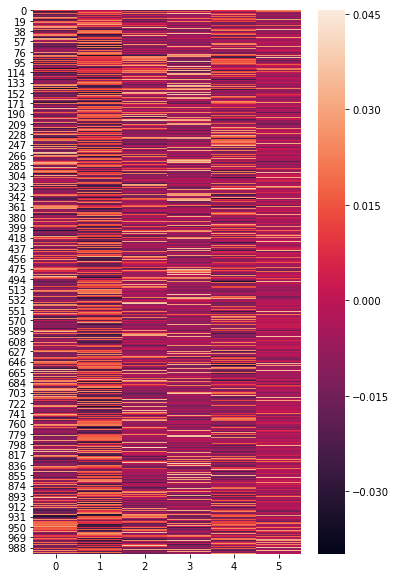

In [25]:
mu = np.mean(ps['uu'],0)
plt.figure(figsize=(6,10))
ax = sns.heatmap(mu, cbar = True )

In [26]:
print(np.round(np.mean(mu,0)*1e4, 2))
hv.Bars(np.mean(abs(mu),0)).options(color='blue', xrotation=90).options(fig_inches=8, aspect=3)

[-0.35  0.3   0.28  0.46  0.22 -0.69]


:Bars   [x]   (y)

In [9]:
print("Avg 0-900 = %.2f \nAvg 901-1000 = %.2f"%(np.mean(mu[:900])*1e3,np.mean(mu[900:])*1e3))

Avg 0-900 = -0.47 
Avg 901-1000 = 2.82


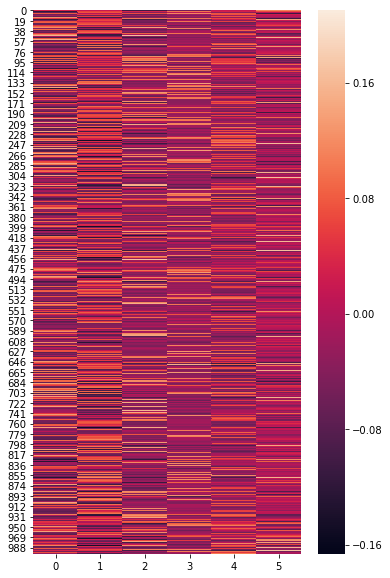

In [131]:
mu1 = np.mean(ps1['uu'],0)
plt.figure(figsize=(6,10))
ax = sns.heatmap(mu1, cbar = True )

In [132]:
print(np.round(np.mean(mu1,0)*1e4, 2))
hv.Bars(np.mean(abs(mu1),0)).options(color='blue', xrotation=90).options(fig_inches=8, aspect=3)

[ 4.36 -5.07  2.01 -3.42 -0.86  7.56]


:Bars   [x]   (y)

In [16]:
print("Avg 0-900 = %.2f \nAvg 901-1000 = %.2f"%(np.mean(mu[:900])*1e3,np.mean(mu[900:])*1e3))

Avg 0-900 = -0.47 
Avg 901-1000 = 2.82


In [12]:
np.mean(mu[:900],0)*1e3

array([-0.51651523,  0.27647594, -0.59786509, -0.29971204, -1.14736767,
       -0.52713823])

In [17]:
np.mean(mu[900:],0)*1e3

array([ 6.24278446, -0.51357661,  1.90470316, -3.31539368,  9.28697307,
        3.34353571])

In [21]:
data['y'][900:, 3:]

array([[-2.88804388, -3.82499607, -4.33257378],
       [-2.09574168, -2.29954194, -3.26631248],
       [-1.0258393 , -0.239612  , -1.82646349],
       [-1.20626283, -0.58698935, -2.06927317],
       [-2.26706032, -2.62938923, -3.496869  ],
       [ 0.45553262,  2.61253826,  0.16713133],
       [-1.93096811, -1.98229617, -3.04456416],
       [-2.60601095, -3.28198572, -3.95302063],
       [-0.42201412,  0.92295906, -1.01385004],
       [-0.04701402,  1.64496318, -0.5091839 ],
       [-2.23220797, -2.56228647, -3.44996554],
       [-2.82657154, -3.70664069, -4.24984579],
       [-0.35101384,  1.059659  , -0.91829957],
       [-3.48417544, -4.97275428, -5.13483335],
       [-2.64870085, -3.36417845, -4.01047167],
       [-0.41513982,  0.93619445, -1.00459877],
       [-1.45634889, -1.06849099, -2.40583299],
       [-1.66868822, -1.4773172 , -2.69159417],
       [-1.04083269, -0.26847945, -1.84664125],
       [-1.55552436, -1.25943787, -2.53930096],
       [-2.72206308, -3.50542598, -4.109

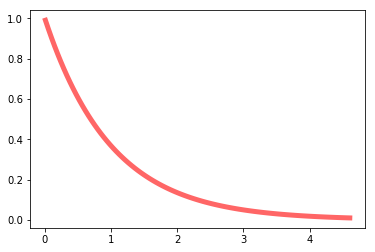

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
from scipy.stats import expon
x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x),
       'r-', lw=5, alpha=0.6, label='expon pdf')

In [41]:
x = expon.rvs(loc = 0, scale = 1/5, size = 1000)
np.percentile(x, q=[0,95])

array([1.79792374e-04, 5.85099091e-01])

## Residual Analysis

In [135]:
# %%opts Bars {+axiswise} [width=1000, height=300, ] 
res = pd.DataFrame(np.mean(abs(np.mean(ps1['uu'], 0)),1))
res.columns = ['avg_u']
res.reset_index(inplace=True)
res.sort_values('avg_u', ascending=False, inplace=True)
hv.Bars(res[:20],).options(color='blue', xrotation=90).options(fig_inches=8, aspect=3)


:Bars   [index]   (avg_u)